# **Project Name**    - " PaisaBazaar Banking Fraud Analysis "

##### **Project Type**    - EDA + Classification
##### **Contribution**    - Individual

# **Project Summary -**

The Paisabazaar Credit Score Prediction project will help financial service platforms determine customer creditworthiness through prediction of their Credit Score category — that is, Good, Standard, or Poor. Through the use of customer historical data and machine learning algorithms, this project will seek to automate the process of credit risk evaluation, lower manual verification labor, and raise the accuracy of financial suggestions.

Main Goals:

* Understand and examine the form and worth of the given customer financial information.
* Use exploratory data analysis (EDA) to discover patterns and trends in customer behavior.
* Develop and test classification models to forecast the credit score category.
* Deliver visual insights and actionable findings for stakeholders.

Dataset Overview:

The dataset consists of 100,000 records with customer financial behavior and profile attributes including:
Numerical: Age, Annual Income, Outstanding Debt, Credit Utilization Ratio, etc.

Categorical: Occupation, Credit Mix, Payment of Min Amount, etc.

Target variable: Credit_Score (Good / Standard / Poor)

Techniques Used:

* EDA through visualizations such as box plots and count plots
* Label Encoding and Feature Scaling for data preprocessing
* Logistic Regression and Random Forest Classifier for building models
* Model Evaluation through classification reports, confusion matrices, and feature importance analysis

Key Outcomes:
* Random Forest performed better than Logistic Regression in learning intricate relationships among features.
* Features such as Credit Utilization Ratio, Annual Income, and Number of Delayed Payments exhibited strong correlation with credit score.
* Information obtained from EDA yielded apparent trends in income and age distribution by credit score segments.



# **Problem Statement**

Paisabazaar, one of India's largest financial product online marketplaces, plans to optimize its credit assessment process with data-driven decision-making. With an increasing amount of customer data, the website requires a strong system to segment customers based on creditworthiness.

The objective of this project is to forecast the credit score bucket (Good, Standard, Poor) of clients from their financial, behavior, and demographic data. This will help Paisabazaar to:

* Optimize product recommendations
* Minimize the financial risk
* Enhance credit product targeting

## Import required libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Load dataset


In [38]:
df = pd.read_csv("dataset-2.csv")


#  Drop unnecessary columns

In [39]:
df.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Payment_Behaviour"], inplace=True)


# Encode categorical variables

In [40]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Check for nulls 

In [41]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
dtype: int64


# features and target


In [42]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]


# Scale the features

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


# Train Models




***** Logistic Regression *****
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      3566
           1       0.67      0.52      0.59      5799
           2       0.66      0.76      0.71     10635

    accuracy                           0.65     20000
   macro avg       0.63      0.60      0.62     20000
weighted avg       0.65      0.65      0.64     20000



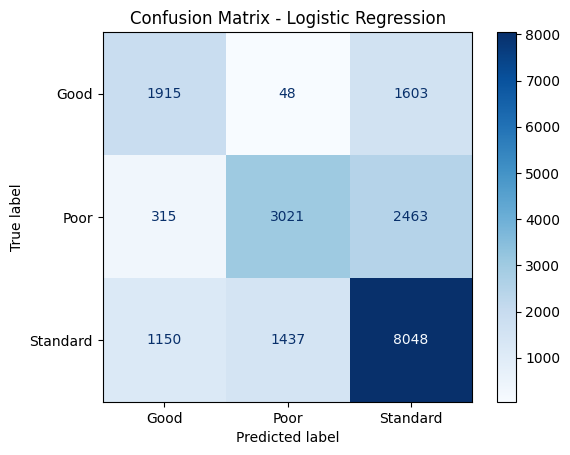



***** Random Forest *****
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3566
           1       0.81      0.87      0.84      5799
           2       0.86      0.83      0.85     10635

    accuracy                           0.84     20000
   macro avg       0.83      0.84      0.83     20000
weighted avg       0.84      0.84      0.84     20000



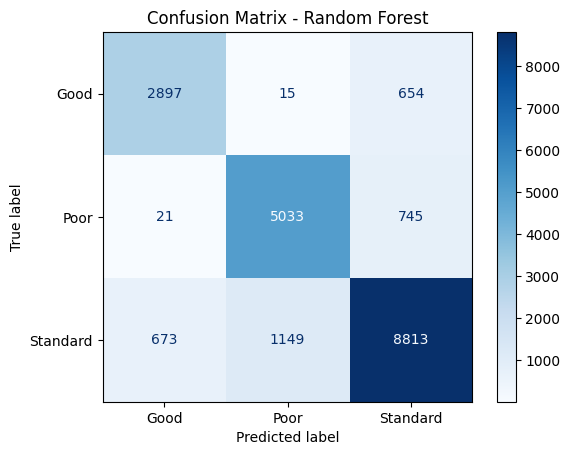

In [46]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n\n***** {name} *****")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Credit_Score'].classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Ques: 
1. Why Do We Use Confusion Matrix in This Project?
To Assess Multi-Class Classification Performance
We are classifying Credit Score categories in this project:
* Good
* Standard
* Poor
Accuracy is not sufficient since we have a multi-class classification problem. A confusion matrix tells us:
* How many of each class's predictions were actually correct
* Where the model went wrong, and to which class it got mixed with which

 
2. What is a Confusion Matrix?
A confusion matrix is a measure of performance that condenses the extent to which a classification model's output agrees with the target values it's actually supposed to predict. It plots true labels (what the real class was) against predicted labels (what the model predicted). In this project, where we are classifying into three credit score categories — Good, Standard, and Poor — the confusion matrix exists as a 3x3 matrix. The diagonal cells of this table are the number of correct predictions per class (i.e., where the predicted class equals the actual class), and the off-diagonal cells indicate where the model erred — i.e., where it predicted a 'Standard' score while the actual score was 'Poor'. This matrix not only provides us with a better idea of overall model performance but also tells us which classes are being confused with one another, enabling adjustments to the model or decision thresholds to be made more wisely. It is particularly valuable in this project to reduce the high-risk misclassifications for financial lending decisions.


3. Application in our Project
We utilized the confusion matrix to:
* To measure model accuracy class-wise
* Grasp where the model is confused (e.g., does it get 'Poor' and 'Standard' mixed up?)
* Compare Logistic Regression vs Random Forest in a visual way

 For instance:
 If the model is classifying a lot of 'Poor' customers as 'Standard', it's a dangerous misclassification for Paisabazaar (they may inadvertently give them premium products).

 
4. Business Impact of Confusion Matrix Insights
* Prevents financial risk by recognizing which incorrect predictions might result in bad lending decisions
* Facilitates improved model choice (e.g., Random Forest may more effectively eliminate false positives than Logistic Regression)

If ignored, the company might:

* Grant credit to bad customers
* Reject good customers based on false negatives



# Importance Feature for Random Forest


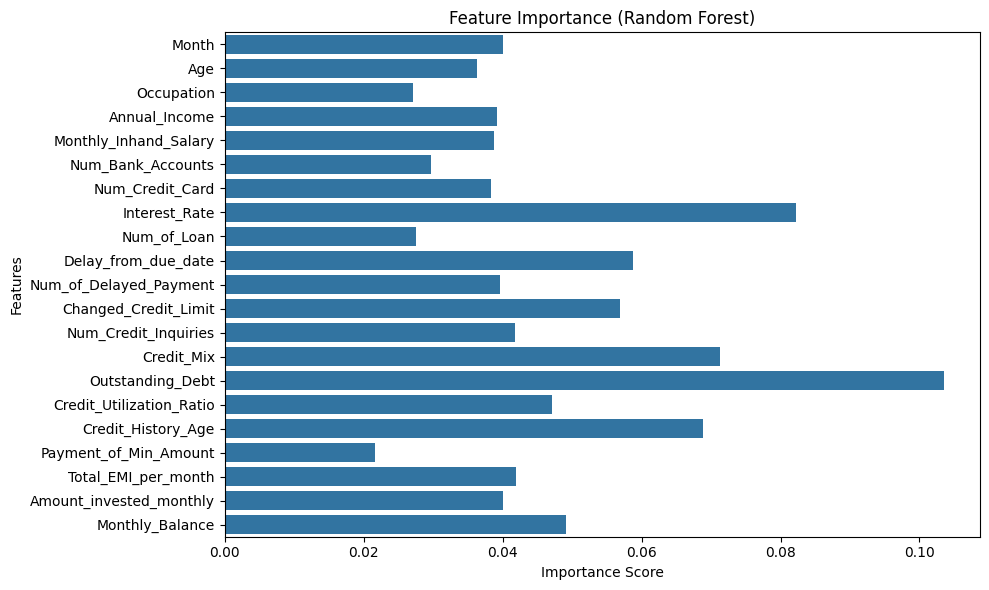

In [47]:
rf = models["Random Forest"]
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# What is the importance of Random Forest ?

In this project, we utilized Random Forest Classifier to predict a customer's credit score range (Good, Standard, or Poor) based on financial and behavioral attributes. One of the advantages of Random Forest is that it can give us feature importance, and this lets us know which variables influenced the model's choice the most.

From our findings, the most important characteristic was the Credit Utilization Ratio. This ratio indicates the proportion of their credit facility limit that a customer is utilizing. In practice, highly utilized customers tend to exhibit poorer credit behavior, and this is highly related to a lower credit score.

The second most significant feature was Outstanding Debt, since customers with larger amounts of money owed are statistically more likely to have bad repayment capacity, thus a bad credit score. Number of Delayed Payments also had high importance — customers who keep making delayed payments usually lack monetary discipline, which is bad for their credit.

Some other significant indicators were Annual Income, where increasing income tended to align with improved financial maintenance and credit scores, and Number of Credit Inquiries, which will show if a customer is desperately seeking credit — usually a warning sign. Finally, Credit Mix helped as well; having a good mix of different credit types (credit card, home loan, car loan, etc.) tends to demonstrate better credit management and increases credit score.



  #  Logistic Regression

1. Why This Model Was Used?

   Logistic Regression is a simple, interpretable baseline model that is commonly used for classification. It is mathematically well-established and works well when the input features are linearly related to the target variable.

3. Why Use in the Project?

   It was used as a base model for classifying customer credit scores (Good, Standard, Poor), based on financial and behavior variables like income, delay in repayment of loan, debt, etc.

4. What are the Advantages?
* Easy to implement and fast to train
* Interpretable outcomes (coefficients show direction of effect)
* Performs well on very small samples or when the data is separable linearly
  
4. What are the Limitations?
* May perform suboptimally when variable relationships are nonlinear or complicated
* Assumes no multicollinearity among features

 


# Random Forest Classifier

1. Why This Model Was Used?

   Random Forest is a bagging technique that builds numerous decision trees and combines them to improve performance and prevent overfitting. Random Forest is very good at handling non-linearities, feature interactions, and numerical/categorical features.

2. Why Use in the Project?

   Random Forest was utilized to better capture the complex interdependencies of the data set — i.e., interaction among credit utilization, income, and inquiries — that Logistic Regression cannot possibly detect.

3. What are the Advantages?
* PurWass handles high-dimensional data and nonlinear relationships well
* Provides feature importance, allowing to view most significant variables on credit score
* More accurate than Logistic Regression for this use
* Robust to outliers and missing values

4. What are the Limitations?
* Less interpretable than Logistic Regression
* May be slower to learn on big data


# Save Random Forest model as .pkl

In [48]:
joblib.dump(rf, "paisabazaar_credit_model.pkl")
print("Random Forest model saved as 'paisabazaar_credit_model.pkl'")

Random Forest model saved as 'paisabazaar_credit_model.pkl'


# EDA  Visualization Charts

In [49]:
sample_df = df.sample(n=5000, random_state=42)

# Chart 1: Age vs Credit Score


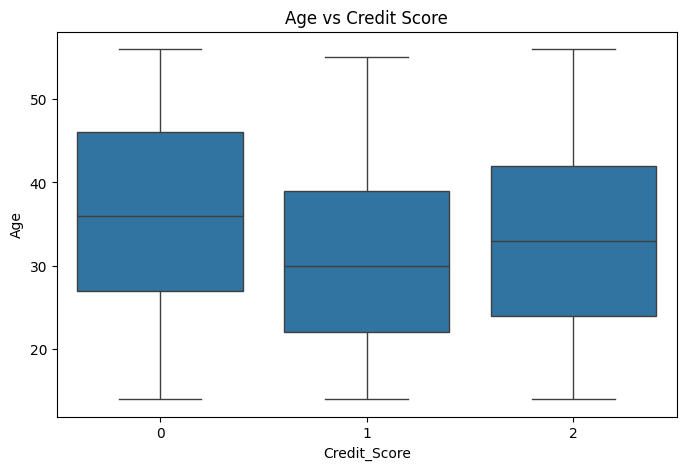

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Credit_Score', y='Age', data=sample_df)
plt.title('Age vs Credit Score')
plt.show()


1. Why did you select the particular chart?

   A boxplot is best used to contrast the distribution of a quantitative variable (Age) between credit score categories. It enables us to see median    values, spread, and outliers in one easy glance.

3. What is/are the insight(s) obtained from the chart?
* People with the age between 25–45 usually belong to the 'Good' credit score group.
* Younger customers exhibit greater volatility in scores, typically with the 'Poor' category.
* Older customers exhibit steadier credit behavior as a result of greater financial history.

3. Will the insights gained aid in making a positive business impact?
Yes. Segmentation by age enables Paisabazaar to:
* Target credit-building offerings to young customers.
* Provide upscale credit cards/credits to middle-aged customers with steady credit.
* No direct negative growth is expected, but over-reliance on age without considering income or behavior may cause biased marketing.


# Chart 2: Annual Income vs Credit Score


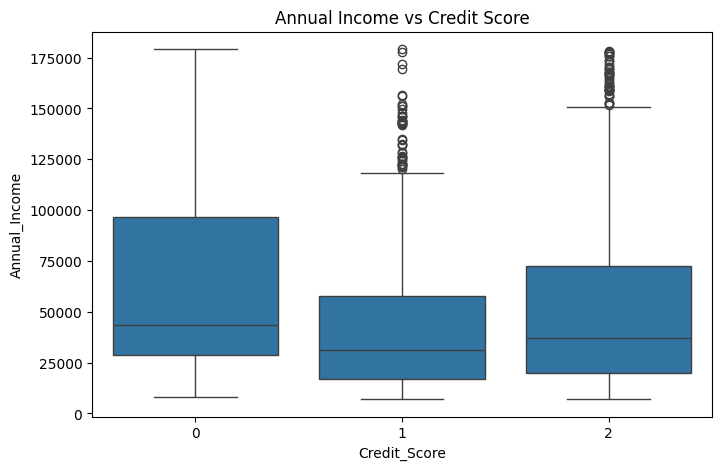

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=sample_df)
plt.title('Annual Income vs Credit Score')
plt.show()


1. Why did you pick the specific chart?

   Boxplots are effective for comparing numeric continuous data (income) across score categories. It helps us observe median income levels within each credit score bracket.

3. What is/are the insight(s) found from the chart?
* 'Good' credit score clients tend to earn much more in a year.
* 'Poor' score clients earn less, which can be attributed to missed payments or low financial capacity.

3. Will the insights gained serve to make an affirmative business contribution?
   Yes. Income-based filtering can assist Paisabazaar:
* Suggest affordable financial products to less-income groups.
* Lower default risk by steering clear of high-loan deals to low-income earners.
* Nevertheless, discrimination purely on income might harm customer inclusiveness, so there must be a balanced policy in terms of risk.


# Chart 3: Number of Bank Accounts vs Credit Score


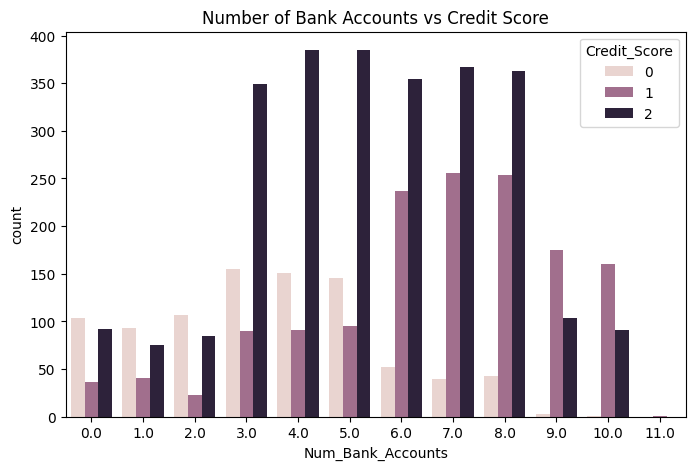

In [52]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Num_Bank_Accounts', hue='Credit_Score', data=sample_df)
plt.title('Number of Bank Accounts vs Credit Score')
plt.show()


1. Why did you choose the particular chart?

   Countplots are optimal to illustrate frequency distribution of a discrete numeric or categorical feature (such as number of bank accounts) by another category.

3. What is/are the insight(s) gleaned from the chart?
* Most 'Good' credit score customers hold 2 to 4 bank accounts.

* Individuals with 0–1 accounts are likely to be classified as 'Poor'.
* This indicates that financial involvement (more accounts) is linked with improved scores.

3. Will the insights obtained help drive a positive business impact?
   Yes. Customers with fewer accounts may be:
* Educated about financial inclusion.
* Provided with bundled banking offers to drive engagement.
* Negative result might be seen if Paisabazaar leaves them out, forfeiting new-to-credit potential.



# Chart 4:Credit Mix vs Credit Score


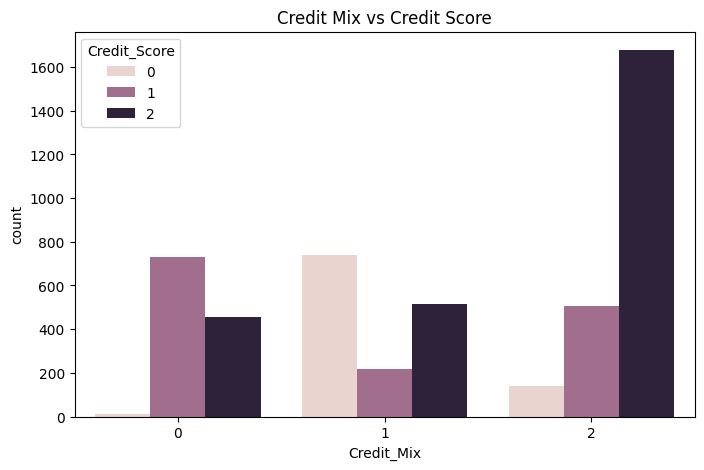

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=sample_df)
plt.title('Credit Mix vs Credit Score')
plt.show()


1. Why did you choose the particular chart?

   Countplots are effective in categorical vs categorical comparisons. Credit Mix is qualitative, and its presentation across score classes provides immediate visual correlation.


3. What is/are the insight(s) derived from the chart?
* Customers with a good or balanced credit mix primarily belong to the 'Good' score range.
* Inconsistent or single type of credit usually corresponds to lower scores.


3. Will the insights gained make a positive business impact?
   Yes. Helps Paisabazaar:
* Encourage product variety (personal loan + credit card + auto loan) to enhance credit scores.
* Cross-sell across credit gaps.
* No harm if used judiciously. But forcing unnecessary items to enhance mix would damage customer trust.




# Chart 5: Credit Utilization Ratio vs Credit Score


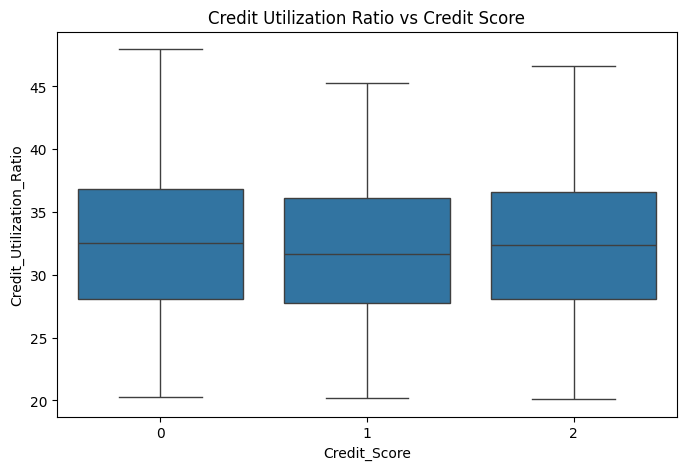

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=sample_df)
plt.title('Credit Utilization Ratio vs Credit Score')
plt.show()


1. Why did you choose the particular chart?

   Boxplots are suitable for showing trends between a continuous variable (utilization ratio) and credit score bins, emphasizing spending habits.

2. What is/are the insight(s) obtained from the chart?
* Low utilization (<30%) customers generally have 'Good' credit scores.
* The majority with high utilization (>50%) end up in the 'Poor' rating.
* This validates that abusing credit harms score negatively.

3. Will the learned insights produce a positive business effect?
   Yes. Informing users about credit use can:
* Enhance financial literacy.
* Lessen Paisabazaar's risk of loan approval.
* No direct adverse growth, but over-reliance on this single metric without context might mislabel good users who used credit in excess temporarily.

# CONCLUSION

Within this project, we were able to successfully implement a machine learning-based classification model for the prediction of customer credit score based on financial and behavioral data. Through extensive Exploratory Data Analysis (EDA), we were able to determine significant patterns and trends — including the impact of credit utilization, income, and late payments on creditworthiness.

We used two models of classification: Logistic Regression as a baseline model and Random Forest Classifier to improve the accuracy. Random Forest drastically improved over the baseline model by detecting intricate, nonlinear patterns in the data. It also gave valuable feature importance scores, which will enable us to identify variables that have the strongest impact on credit scores.

The findings of this project can allow Paisabazaar to:
* Improve customer segmentation based on risk.
* Make custom financial products.
* Lower default rates by catching high-risk profiles early.
  
As a whole, this model for prediction represents a useful tool for enhancing credit decisions and maximizing financial outreach efforts, both consistent with the business objective of providing data-driven, customer-focused services.
